In [70]:
import librosa
import librosa.display
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sn
import IPython.display as ipd
import os 
import math
import numpy as np
import warnings

## be cautious
warnings.filterwarnings("ignore")
##

FREQUENCY = 16000

# load a wave data
def load_wave_data(file_name, audio_dir="./"):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=FREQUENCY)
    return x,fs

# change wave data to mfcc
def calculate_mfcc(x, n_fft=2048, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft)
    mfcc = librosa.feature.mfcc(S=melsp)
    mfcc = preprocessing.scale(mfcc, axis=1)
    return mfcc

# display wave in plots
def show_wave(x, wave_name):
    print(wave_name)
    plt.plot(x)
    plt.show()

# display mfcc in heatmap
def show_mfcc(mfcc, fs, wave_name):
    print(wave_name)
    librosa.display.specshow(mfcc, sr=fs)
    plt.colorbar()
    plt.show()

# calculate SNR 
#axis = Axis along which the mean is to be computed
#ddof = Degree of freedom correction for Standard Deviation
#def calculate_snr(a, axis = 0, ddof = 0): 
#    a = np.asanyarray(a) 
#    m = a.mean(axis) 
#    sd = a.std(axis = axis, ddof = ddof)
#    return np.where(sd == 0, 0, m / sd) 

#SNR = 20log10(amplitude(signal)/amplitude(noise)), amplitude of signal = RMS(signal)
def calculate_snr(audio, noise):
    amp_signal = np.sqrt(np.mean((audio-noise)**2))
    amp_noise = np.sqrt(np.mean(noise**2))
    if amp_noise == 0:
        snr = "no noise"
    else:
        snr = 20 * math.log10(amp_signal / amp_noise)
    return snr
    
# data augmentation: add white noise
def add_white_noise(x, rate=0.005):
    noise = rate*np.random.randn(len(x))
    return x + noise, noise

def signal_analysis(audio, filename = "input audio", noise = 0):
    mfcc = calculate_mfcc(audio)
    snr = calculate_snr(audio, noise)
    print("wave size:{0}\nsampling rate:{1}\nmfcc size:{2}\nSNR:{3}\n".format(audio.shape, FREQUENCY, mfcc.shape, snr))
    show_wave(audio, filename)
    show_mfcc(mfcc, FREQUENCY, filename)
    ipd.Audio(audio, rate=FREQUENCY)

wave size:(128000,)
sampling rate:16000
mfcc size:(20, 1001)
SNR:no noise

utt1.wav


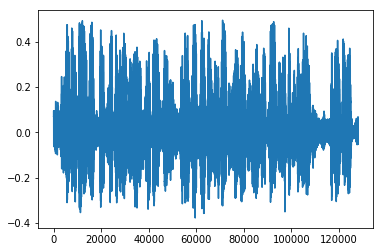

utt1.wav


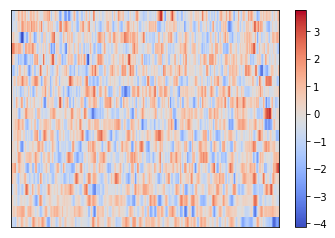

In [71]:
# raw data
file_dir = "/home/Yuunin/adversarial/audio_adversarial_examples/audio_voxceleb2/"
filename = "utt1.wav"
x, fs = load_wave_data(filename, file_dir)

signal_analysis(x, filename)

ADD WHITE NOISE
wave size:(128000,)
sampling rate:16000
mfcc size:(20, 1001)
SNR:38.86346421679833

utt1.wavwhite0.001


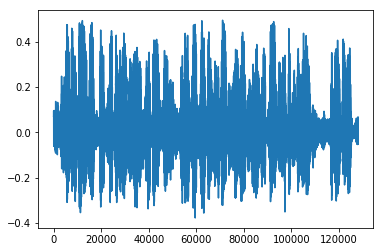

utt1.wavwhite0.001


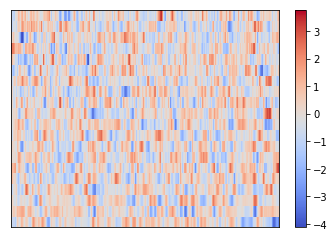

In [79]:
print("ADD WHITE NOISE")
epsilon = 0.001
x_wn, noise = add_white_noise(x, epsilon)
signal_analysis(x_wn, str(filename + "white" + str(epsilon)), noise)

In [84]:
np.set_printoptions(threshold=np.inf)
print(noise, noise.size)

[-1.19738300e-03 -1.42144660e-03  9.66433472e-04 -7.83628066e-04
  7.33553948e-04  5.66007402e-06 -7.43294694e-04  1.91685999e-05
 -5.41677011e-04  2.35468240e-04 -1.07471121e-03  2.51876470e-04
 -5.98466733e-04  6.18221498e-04  6.92915768e-04 -7.89949019e-04
  1.19587996e-03  1.76438362e-04  1.28357054e-03 -2.39796433e-04
  3.42609705e-04 -3.73057550e-04 -2.89354769e-03 -4.35803581e-04
  8.13506512e-05 -2.49169355e-03  2.00576898e-04 -2.65884015e-04
  8.77369368e-04 -1.12096104e-03 -1.16244759e-03 -1.43163248e-04
 -1.82399960e-04  1.01235816e-06  9.86200819e-04 -3.38342571e-04
  5.97328309e-04  9.08157530e-04 -2.42048178e-03 -6.58926381e-04
 -1.10550423e-03  1.53245196e-03  1.07563641e-03 -2.13317877e-04
 -1.00158632e-03  8.06747660e-04 -3.59199841e-04 -9.63314879e-04
  7.71530817e-04 -1.22002883e-03  4.67087884e-04  3.18641525e-03
 -5.84074013e-05 -5.18755168e-04  1.01534594e-03 -1.00835512e-03
  8.32887924e-04  1.53826158e-03  6.98316915e-04  4.24171124e-04
  1.38209854e-04  1.13130